In [2]:
import pickle
from sklearn import linear_model
import pandas as pd

In [3]:
# get the pre-processed data.
with open('data_processed', 'rb') as f:
    data = pickle.load(f)
data.head()

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,avg
0,29,0,0,0,0,114.30
1,36,1,0,0,0,94.00
2,37,0,0,0,0,81.00
3,37,1,0,0,0,100.33
4,38,1,0,0,0,99.80


In [4]:
# divide data into testing and training models
from sklearn import cross_validation,model_selection
X = data
Y = data['avg']

# drop the avg from training model
X.drop('avg', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
X_train.shape

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(37, 5)

In [5]:
# importing and creating our regression model
regression = linear_model.LinearRegression()
# training our mdoel
regression.fit(X_train, Y_train)
# calculating our acccuracy on test data
accuracy = regression.score(X_test,Y_test)

print(accuracy)

0.899722335547


In [6]:
print(regression.coef_)

[-0.97323125 -1.21309986  1.51624259 -4.0560706   5.50988267]


In [7]:
regression.predict([[75,1,0,0,0]])

array([ 58.83224886])

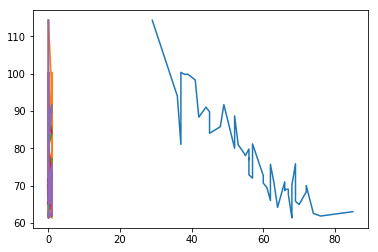

In [9]:
from matplotlib import pyplot
pyplot.plot(X,Y)
pyplot.show()